In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# **Code modules**
1. Data Exploration
2. Data cleaning (Finding missing values, duplicates)
3. Data visualization
4. Feature engineering (Correlations, Redundancy)
4. Model selection
5. Model evaluation metrics

In [3]:
#1. Data Exploration: Load data files, explore data statistics
#Training data
def load_data(file):
    df = pd.read_csv(file)
    return df

def get_stats(df, label):
    #----------Preliminary description of training data-------------
    print("Reading statistics of " + label + " data....")
    print("\nDataframe has " + str(df.shape[0]) + " entries and " + str(df.shape[1]) + "columns")
    print("\nDataframe columns & their data types")
    print(df.info())
    print("\nData distribution of columns")
    print(df.describe())
    print("\nDuplicate entries in dataframe except their first occurence")
    print(df[df.duplicated()])
    #Find count of unique values in df
    print("\nCount of unique values per column")
    print(df.nunique())

In [4]:
train = load_data('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
get_stats(train, 'Train')

Reading statistics of Train data....

Dataframe has 891 entries and 12columns

Dataframe columns & their data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Data distribution of columns
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891

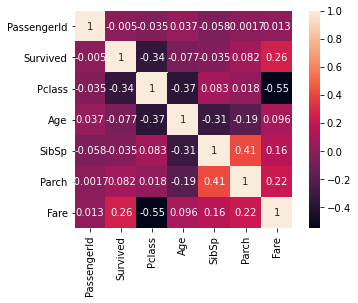

In [6]:
#2. Data visualization: Find relationships between features and target variable
#Correlation matrix of numeric columns
sns.heatmap(train.corr(), square=True, annot=True)

In [7]:
#3. Data cleaning - Investigating columns with null values

#Column: 'Embarked':
print(train.loc[train['Embarked'].isnull()])

#Column:'Cabin'
print(train.Cabin.unique())
print(train.Cabin.value_counts())

#Column:'Age'
print(train.groupby('Sex').Age.describe())
print(train.loc[train.Age.isnull()].Sex.value_counts())

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D

In [8]:
class Data_cleaning():
    #Fill null values and clean noisy columns to get clean features
    
    def clean_Embarked(self, df):
        """1. Column="Embarked"
            Ticket, Fare and Cabin entries are similar & occur only for these 2 rows. 
            Given low count of missing values & no viable feature to derive values, 
            'Embarked' assigned category using df.mode() value that appears most for Pclass=1  
        """
        df['Embarked'].fillna(df.loc[df['Pclass']==1].Embarked.mode()[0], inplace=True)
        return df
    
    def clean_Name(self, df):
        #Combining Name column to fewer categories (Master, Mr, Miss, Mrs, Other)
        df['Prefix']=df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])  
        df['Prefix']=df.Prefix.replace(['Mlle', 'Ms'],'Miss')
        df['Prefix']=df.Prefix.replace('Mme','Mrs')
        df['Prefix']=df.Prefix.replace(['Capt','Col','Don','Dr','Jonkheer','Lady','Major', 'Rev', 'Sir', 'the Countess', 'Dona'],'Other')
        return df
    
    def clean_Age(self, df):
        """Column Age: Mean and median values & data distribution for both sex indicate a normal distribution. 
        >> Age missing data can be replaced with mean/median value
        >> Age  can be derived from Name column using Prefix (Ms/Mr/Mrs): for e.g. for 'Ms.' in train[Name], implies
        it is a female minor, so Age is in range of [0-18]. 
        Finding entries in this age range & replacing null value with median of Age of this filtered df
        """
        #Populating Age null values by using median of rows with "Age" having same "Prefix"
        df['Age']=df.groupby('Prefix')['Age'].apply(lambda x:x.fillna(x.median(skipna=True)))
        return df

In [9]:
#Get the clean Dataframe
clean = Data_cleaning()
train_cl = clean.clean_Embarked(train)
train_cl = clean.clean_Name(train_cl)
train_cl = clean.clean_Age(train_cl)
train_cl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


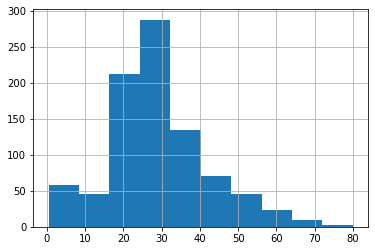

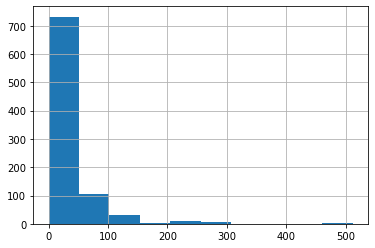

In [10]:
#Distribution of continuous variables
plt.figure()
train_cl.Age.hist()
plt.figure()
train_cl.Fare.hist()

In [11]:
#4
class Feature_engineering():
    def get_feature_bins(self, df, col, bins, labels):
        #Convert continuous variables into category bins
        print(df[col])
        df[col]= pd.cut(df[col], bins=bins, labels=labels)
        return df
    def encode_features(self, df, feature_lst):
        return pd.get_dummies(df, columns=feature_lst)
    

In [12]:
feat_eng = Feature_engineering()

#Age bins: Child,Teen, Adult, Senior
train_df = feat_eng.get_feature_bins(train_cl, col='Age', bins=[0,12,18,62,80], labels=['Child', 'Teen','Adult', 'Senior'])

#Fare bins: L,M,H, VH. Splitting by Quartile, due to uneven distribution
train_df = feat_eng.get_feature_bins(train_df, col='Fare', bins=list(train_df.Fare.quantile([.0, .25, .5, .75, 1.0])), labels=['L', 'M','H', 'VH'])

#One-hot encoding on Categorical variables
feature_lst =['Sex', 'Embarked', 'Prefix', 'Age', 'Fare']
train_df = feat_eng.encode_features(train_df, feature_lst)

#Drop unused columns
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_df.head()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Master,...,Prefix_Mrs,Prefix_Other,Age_Child,Age_Teen,Age_Adult,Age_Senior,Fare_L,Fare_M,Fare_H,Fare_VH
0,0,3,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,3,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,1,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,0,3,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


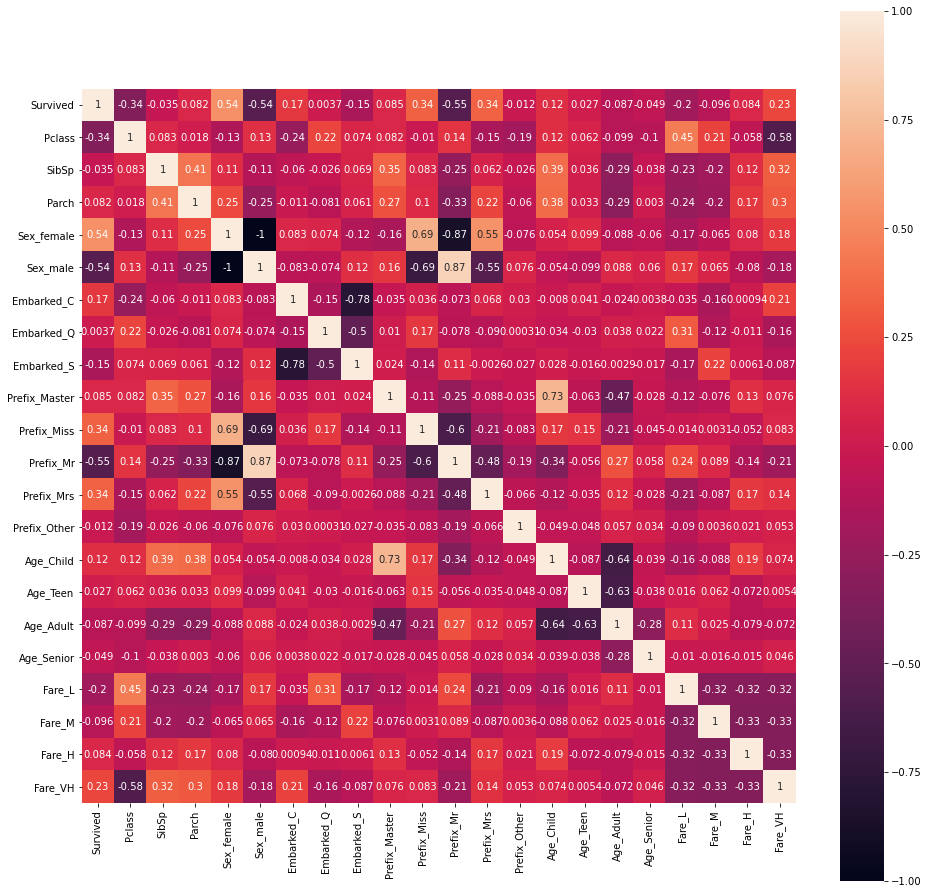

In [13]:
#Find correlations between encoded variables & target variable
plt.figure(figsize=(16,16))
sns.heatmap(train_df.corr(), square=True, annot=True)

# ****Model Selection: Samruddhi

In [14]:
#Split data into training & test data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val =train_test_split(train_df.drop(['Survived'],axis=1), train_df['Survived'],test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
#---Logistic Regression ----
lr_model= LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

#---SVM----
svc_model= SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_val)

# ****Model Evaluation-Samruddhi

0.7932960893854749
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



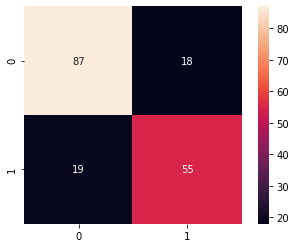

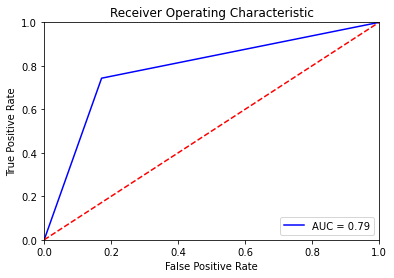

In [17]:
#----------------Logistic Regression performance------------
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_curve, auc

#Accuracy score
print(accuracy_score(y_val, lr_pred))

#Classification report
print(classification_report(y_val, lr_pred))

#Confusion matrix 
sns.heatmap(confusion_matrix(y_val, lr_pred), square=True, annot =True)

#ROC curve
fpr, tpr, threshold = roc_curve(y_val, lr_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

0.8356416275430358


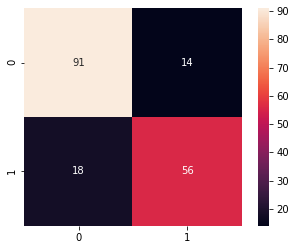

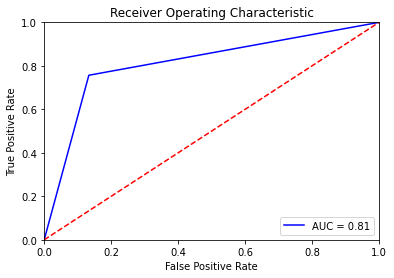

In [18]:
#----------------SVM performance------------
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
#Accuracy score
print(accuracy_score(y_val, svc_pred))

#Classification report
print(classification_report(y_val, svc_pred))

#Confusion matrix 
sns.heatmap(confusion_matrix(y_val, svc_pred), square=True, annot =True)

#ROC curve
fpr, tpr, threshold = roc_curve(y_val, svc_pred)
roc_auc = auc(fpr, tpr)

#Cross val score
print(cross_val_score(svc_model, X_train, y_train, cv=10, n_jobs=1, scoring='accuracy').mean())

# method I: plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Model Testing on Test data**
* Load Data
* Show Preliminary Data stastics
* Clean and engineer test features
* Estimate model performance on test data

In [19]:
test= load_data('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
get_stats(test, 'Test')

Reading statistics of Test data....

Dataframe has 418 entries and 11columns

Dataframe columns & their data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

Data distribution of columns
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  4

In [21]:
test_cl=clean.clean_Name(test)
test_cl = clean.clean_Age(test_cl)
test_cl.loc[test_cl.Fare.isnull(), 'Fare']= test_cl.Fare.median(skipna=True)
test_cl.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [22]:
#Age bins: Child,Teen, Adult, Senior
test_df = feat_eng.get_feature_bins(test_cl, col='Age', bins=[0,12,18,62,80], labels=['Child', 'Teen','Adult', 'Senior'])
#Fare bins: L,M,H, VH. Splitting by Quartile, due to uneven distribution
test_df = feat_eng.get_feature_bins(test_df, col='Fare', bins=list(test_df.Fare.quantile([.0, .25, .5, .75, 1.0])), labels=['L', 'M','H', 'VH'])
#One-hot encoding on Categorical variables
feature_lst =['Sex', 'Embarked', 'Prefix', 'Age', 'Fare']
test_df = feat_eng.encode_features(test_df, feature_lst)

#Drop unused columns
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.head()

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    28.5
414    39.0
415    38.5
416    28.5
417     7.0
Name: Age, Length: 418, dtype: float64
0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64


,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Master,...,Prefix_Mrs,Prefix_Other,Age_Child,Age_Teen,Age_Adult,Age_Senior,Fare_L,Fare_M,Fare_H,Fare_VH
0,892,3,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,893,3,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,894,2,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,895,3,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,896,3,1,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [23]:
y_pred= svc_model.predict(test_df.drop('PassengerId', axis=1))
test_df['Survived']= y_pred
submission = test_df[['PassengerId', 'Survived']]
submission.head()
submission.to_csv('/kaggle/working/submission.csv', index= False)

In [24]:
!ls 

__notebook_source__.ipynb  submission.csv
